In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from imblearn.metrics import sensitivity_specificity_support
import seaborn as sn
import pandas as pd
from sklearn import metrics
from PIL import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class_name = ['Normal','ApNormal']

train_image = []
train_label = []

test_image = []
test_label = []

val_image = []
val_label = []

train_path = "/kaggle/input/leukemia-all/Dataset/train"
test_path = "/kaggle/input/leukemia-all/Dataset/test"
val_path = "/kaggle/input/leukemia-all/Dataset/val"

for categ in os.listdir(train_path):
    for filename in tqdm(os.listdir(os.path.join(train_path,categ))):
        img = Image.open(os.path.join(train_path,categ,filename))
        img = img.resize((200,200))
        img_array = np.array(img)
        train_image.append(img_array)
        if categ == "hem":
            train_label.append(0)
        elif categ == "all":
            train_label.append(1)
            
for categ in os.listdir(test_path):
    for filename in tqdm(os.listdir(os.path.join(test_path,categ))):
        img = Image.open(os.path.join(test_path,categ,filename))
        img = img.resize((200,200))
        img_array = np.array(img)
        test_image.append(img_array)
        if categ == "hem":
            test_label.append(0)
        elif categ == "all":
            test_label.append(1)
            
for categ in os.listdir(val_path):
    for filename in tqdm(os.listdir(os.path.join(val_path,categ))):
        img = Image.open(os.path.join(val_path,categ,filename))
        img = img.resize((200,200))
        img_array = np.array(img)
        val_image.append(img_array)
        if categ == "hem":
            val_label.append(0)
        elif categ == "all":
            val_label.append(1)

100%|██████████| 1477/1477 [00:24<00:00, 61.22it/s]


In [3]:
train_image = np.array(train_image)
train_label = np.array(train_label)

test_image = np.array(test_image)
test_label = np.array(test_label)

val_image = np.array(val_image)
val_label = np.array(val_label)

In [4]:
print("Shape of train images is: ", train_image.shape)
print("Len of train labels is: ", len(train_label))
print(train_label)
print('='*10)
print("Shape of test images is: ", test_image.shape)
print("Len of test labels is: ", len(test_label))
print(test_label)
print('='*10)
print("Shape of val images is: ", val_image.shape)
print("Len of val labels is: ", len(val_label))
print(val_label)

Shape of train images is:  (11114, 200, 200, 3)
Len of train labels is:  11114
[1 1 1 ... 0 0 0]
Shape of test images is:  (1590, 200, 200, 3)
Len of test labels is:  1590
[1 1 1 ... 0 0 0]
Shape of val images is:  (3175, 200, 200, 3)
Len of val labels is:  3175
[1 1 1 ... 0 0 0]


In [5]:
train_image = train_image / 255.0
test_image = test_image / 255.0
val_image = val_image / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(2, (3,3), activation='relu', input_shape=train_image.shape[1:]),
    keras.layers.Conv2D(4, (3,3), activation='relu'),
    keras.layers.Conv2D(8, (5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(24, (7,7), activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_image, train_label, epochs=50, batch_size=64 ,validation_data=(val_image,val_label))

Epoch 1/50
174/174 [==============================] - 482s 3s/step - loss: 0.4154 - accuracy: 0.8137 - val_loss: 0.3926 - val_accuracy: 0.8293
Epoch 2/50
174/174 [==============================] - 479s 3s/step - loss: 0.3699 - accuracy: 0.8375 - val_loss: 0.3846 - val_accuracy: 0.8356
Epoch 3/50
174/174 [==============================] - 475s 3s/step - loss: 0.3608 - accuracy: 0.8430 - val_loss: 0.3642 - val_accuracy: 0.8460
Epoch 4/50
174/174 [==============================] - 477s 3s/step - loss: 0.3517 - accuracy: 0.8478 - val_loss: 0.3765 - val_accuracy: 0.8391
Epoch 5/50
174/174 [==============================] - 477s 3s/step - loss: 0.3419 - accuracy: 0.8499 - val_loss: 0.3607 - val_accuracy: 0.8438
Epoch 6/50
174/174 [==============================] - 476s 3s/step - loss: 0.3347 - accuracy: 0.8579 - val_loss: 0.3516 - val_accuracy: 0.8513
Epoch 7/50
174/174 [==============================] - 477s 3s/step - loss: 0.3378 - accuracy: 0.8518 - val_loss: 0.3528 - val_accuracy: 0.8567

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoches = range(1, len(acc) + 1)

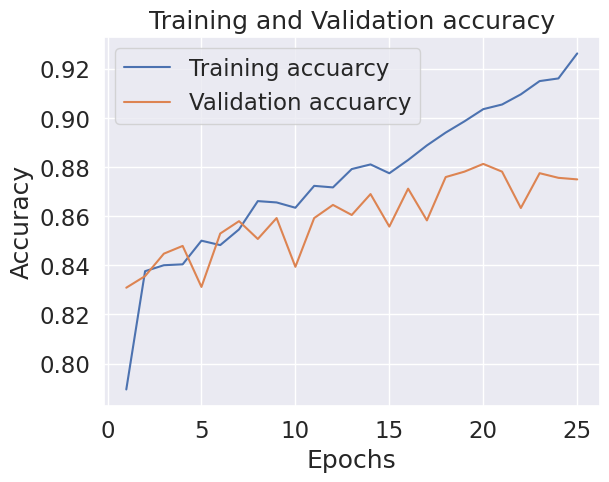

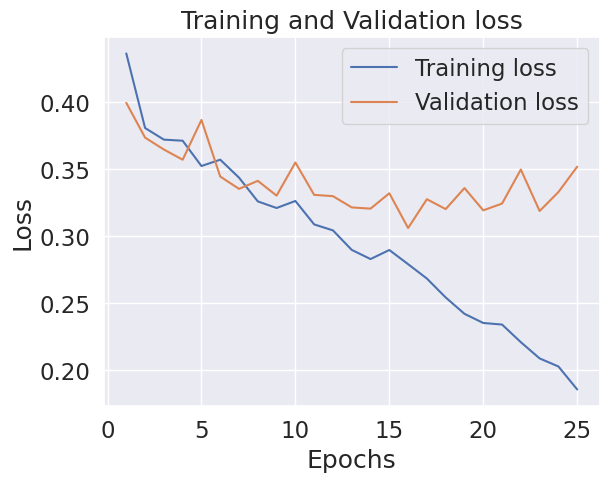

In [85]:
plt.plot(epoches, acc, label = 'Training accuarcy')
plt.plot(epoches, val_acc, label = 'Validation accuarcy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoches, loss, label = 'Training loss')
plt.plot(epoches, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
results = model.evaluate(test_image,test_label, verbose = 1)

50/50 [==============================] - 11s 229ms/step - loss: 0.8253 - accuracy: 0.8503


In [88]:
output = model.predict(test_image, verbose = 1)
y_pred = np.argmax(output,axis = 1)
  
target_names = ['Class Normal', 'Class ApNormal']
print(classification_report(test_label, y_pred, target_names = target_names, digits = 4))

50/50 [==============================] - 12s 234ms/step
                precision    recall  f1-score   support

  Class Normal     0.9035    0.7595    0.8253       740
Class ApNormal     0.8161    0.9294    0.8691       850

      accuracy                         0.8503      1590
     macro avg     0.8598    0.8444    0.8472      1590
  weighted avg     0.8568    0.8503    0.8487      1590



              precision    recall  f1-score   support

      Normal     0.9035    0.7595    0.8253       740
    ApNormal     0.8161    0.9294    0.8691       850

    accuracy                         0.8503      1590
   macro avg     0.8598    0.8444    0.8472      1590
weighted avg     0.8568    0.8503    0.8487      1590



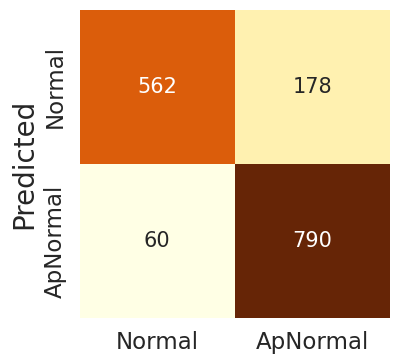

In [89]:
report = classification_report(test_label, y_pred, target_names = ['Normal', 'ApNormal'], digits = 4)
print(report)

disp = metrics.confusion_matrix(test_label, y_pred)
disp.astype('int')
pd.options.display.float_format = '{:.5f}'.format
target_names = ['Normal', 'ApNormal']
df_cm = pd.DataFrame(disp, target_names, target_names)
fig, ax = plt.subplots(figsize = (4,4))
sn.set(font_scale = 1.5)
sn.heatmap(df_cm, annot = True, annot_kws = {"size": 15}, ax = ax, cmap = "YlOrBr", fmt = 'g', cbar = False)
plt.ylabel('Actual', fontsize = 20)
plt.ylabel('Predicted', fontsize = 20)
plt.ioff()
plt.show()